In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np 
import collections
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cnt = Counter()
%matplotlib inline

In [2]:
data = pd.read_csv("final_clean_data.csv")
data.clean_tweet4 = data.clean_tweet4.astype(str)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2) 
data.shape

(66650, 10)

In [3]:
# This line can be used to remove amp, some HTML that wasnt removed during cleaning 

def remove_html_code(text):
    text = re.sub(r'\bamp\b\s+',"",text)
    return text

# To loop through and apply function
data['clean_tweet4'] = data['clean_tweet4'].apply(lambda x: remove_html_code(x))

In [4]:
# Get the Keyword lists 
keyword_list = pd.read_csv(r"C:\Users\User\Code-ML\Omdenna-SG\Output\Keyword-list.csv")
mh_list = keyword_list["Mental Health Keywords"][:-3].tolist()
pd_list = keyword_list["Pandemic Keywords"].tolist()

In [5]:
# Split data by keyword lists
data_mh= data[data["search"].isin(mh_list)]
data_pd= data[data["search"].isin(pd_list)]

# Split data by keyword lists
data_19 = data[data.year == 2019]
data_20 = data[data.year == 2020]
data_21 = data[data.year == 2021]

Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9]
Q4 = [10,11,12]

# Data of mental health keywords
mh_19 = data_mh[data_mh.year == 2019]
mh_20 = data_mh[data_mh.year == 2020]
mh_21 = data_mh[data_mh.year == 2021]

# Data of pandemic keywords
pd_19 = data_pd[data_pd.year == 2019]
pd_20 = data_pd[data_pd.year == 2020]
pd_21 = data_pd[data_pd.year == 2021]

# 2019 data split by quarter 
mh_19_Q1 = mh_19[mh_19['month'].isin(Q1)]
mh_19_Q2 = mh_19[mh_19['month'].isin(Q2)]
mh_19_Q3 = mh_19[mh_19['month'].isin(Q3)]
mh_19_Q4 = mh_19[mh_19['month'].isin(Q4)]

pd_19_Q1 = pd_19[pd_19['month'].isin(Q1)]
pd_19_Q2 = pd_19[pd_19['month'].isin(Q2)]
pd_19_Q3 = pd_19[pd_19['month'].isin(Q3)]
pd_19_Q4 = pd_19[pd_19['month'].isin(Q4)]

# 2020 data split by quarter 
mh_20_Q1 = mh_20[mh_20['month'].isin(Q1)]
mh_20_Q2 = mh_20[mh_20['month'].isin(Q2)]
mh_20_Q3 = mh_20[mh_20['month'].isin(Q3)]
mh_20_Q4 = mh_20[mh_20['month'].isin(Q4)]

pd_20_Q1 = pd_20[pd_20['month'].isin(Q1)]
pd_20_Q2 = pd_20[pd_20['month'].isin(Q2)]
pd_20_Q3 = pd_20[pd_20['month'].isin(Q3)]
pd_20_Q4 = pd_20[pd_20['month'].isin(Q4)]

# 2021 data split by quarter 
mh_21_Q1 = mh_21[mh_21['month'].isin(Q1)]
mh_21_Q2 = mh_21[mh_21['month'].isin(Q2)]

pd_21_Q1 = pd_21[pd_21['month'].isin(Q1)]
pd_21_Q2 = pd_21[pd_21['month'].isin(Q2)]

pd_21_Q1.month.unique()

array([3, 2, 1], dtype=int64)

In [11]:
# Plot Wordcloud for Top-50 words

# Add on my own stopwords
my_stopwords = ['gt', 'day', 'majlis', 'seems'] #(ncid, recei, ment, jibril, surat, awa???)
STOPWORDS.update(my_stopwords)
stopwords = set(STOPWORDS)

def display_wordcloud(data, title = None):
    content = data.values
    wordcloud = WordCloud(
        
        background_color='black',
        width = 4000,
        height = 2500,
        stopwords=stopwords,
        max_words=750,
        random_state=1
    ).generate(str(content))

    fig = plt.figure( figsize=(10, 8))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

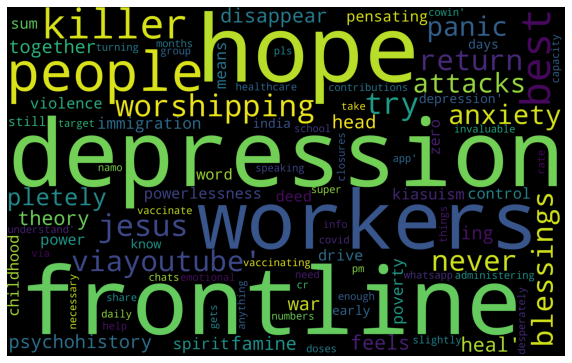

In [12]:
display_wordcloud(data.clean_tweet4)

In [13]:
#Count frequent words
from collections import Counter
cnt = Counter()
counts = 0
for text in data.clean_tweet4.values:
    text = str(text)
    for word in text.split():
        cnt[word] += 1
cnt.most_common(20)

[('help', 8678),
 ('singapore', 6928),
 ('tired', 6706),
 ('covid', 5563),
 ('like', 4658),
 ('fight', 4484),
 ('people', 4101),
 ('one', 3611),
 ('get', 3434),
 ('day', 3420),
 ('time', 3380),
 ('dead', 3270),
 ('mask', 2933),
 ('need', 2916),
 ('us', 2737),
 ('go', 2415),
 ('good', 2336),
 ('death', 2336),
 ('still', 2307),
 ('new', 2304)]

<AxesSubplot:title={'center':'Tweets collected by pandemic keywords vs mental health keywords from 2019 to 2020 by quarter'}>

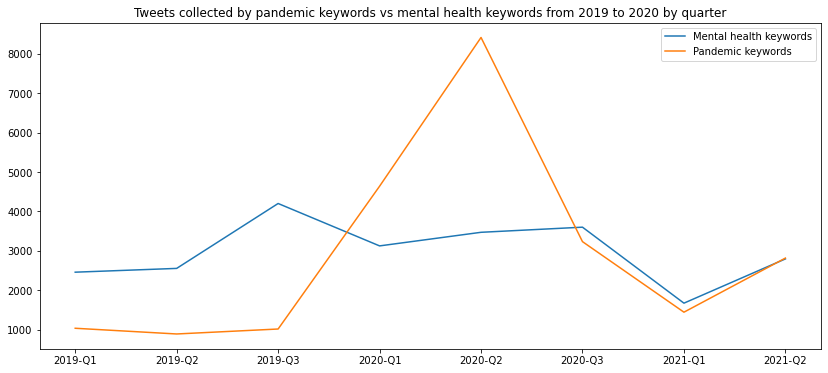

In [14]:
plt.figure(figsize=(14,6))
plt.title("Tweets collected by pandemic keywords vs mental health keywords from 2019 to 2020 by quarter")

x = ['2019-Q1', '2019-Q2', '2019-Q3', '2020-Q1', '2020-Q2', '2020-Q3', '2021-Q1', '2021-Q2']
y = [len(mh_19_Q1), len(mh_19_Q2), len(mh_19_Q3), len(mh_20_Q1), len(mh_20_Q2), len(mh_20_Q3), 
    len(mh_21_Q1), len(mh_21_Q2)]

sns.lineplot(x =x, y=y, label='Mental health keywords')

x = ['2019-Q1', '2019-Q2', '2019-Q3', '2020-Q1', '2020-Q2', '2020-Q3', '2021-Q1', '2021-Q2']
y = [len(pd_19_Q1), len(pd_19_Q2), len(pd_19_Q3), len(pd_20_Q1), len(pd_20_Q2), len(pd_20_Q3), 
    len(pd_21_Q1), len(pd_21_Q2)]

sns.lineplot(x =x, y=y, label='Pandemic keywords')

# Vectorization 

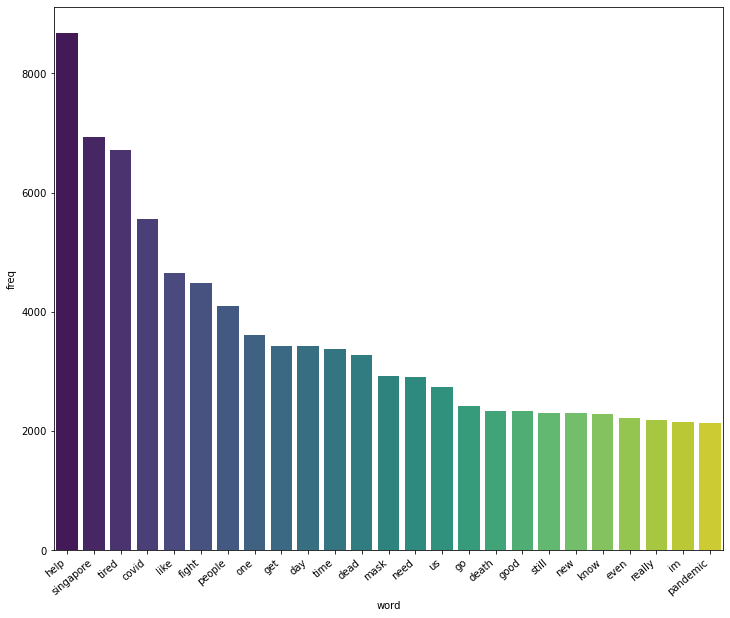

In [15]:
# Ref: https://github.com/bertcarremans/TwitterUSAirlineSentiment/blob/master/source/Predicting%20sentiment%20with%20text%20features.ipynb
# Vectorization 

# Stop words 
from sklearn.feature_extraction import text 
my_additional_sw = [ 'im', 'day'] # My own list of stopwords 
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_sw)

# Vectorization 
cv = CountVectorizer()
bow = cv.fit_transform(data.clean_tweet4)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(25), columns = ['word', 'freq'])

# Visualzie the vectorized tweets 
fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="viridis", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show();

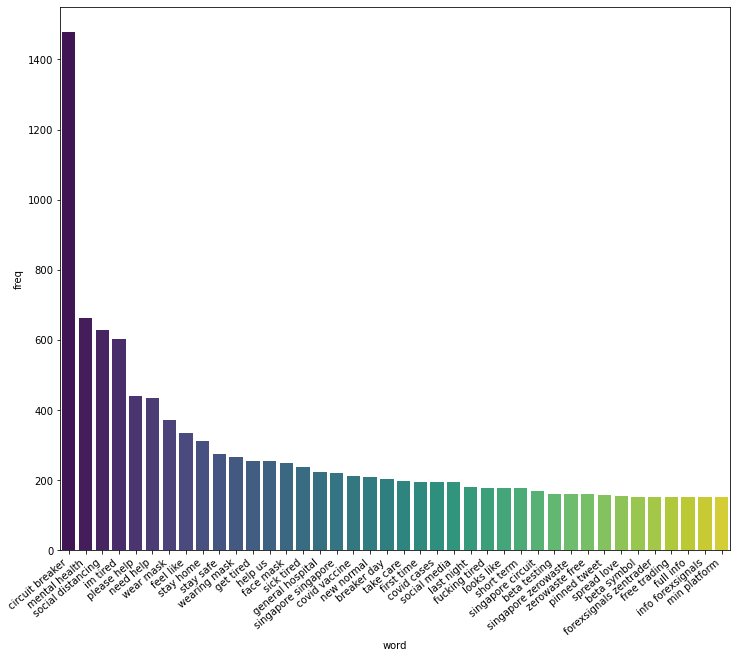

In [16]:
# Adding N gram argument to the vectorizer (small tweak to the code from the source)

# Stop words 
from sklearn.feature_extraction import text 
my_additional_sw = [ 'im', 'day']
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_sw)

# Vectorization 
cv = CountVectorizer(analyzer='word', ngram_range=(2, 2))
bow = cv.fit_transform(data.clean_tweet4)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(40), columns = ['word', 'freq'])

# Visualzie the vectorized tweets 
fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="viridis", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show();

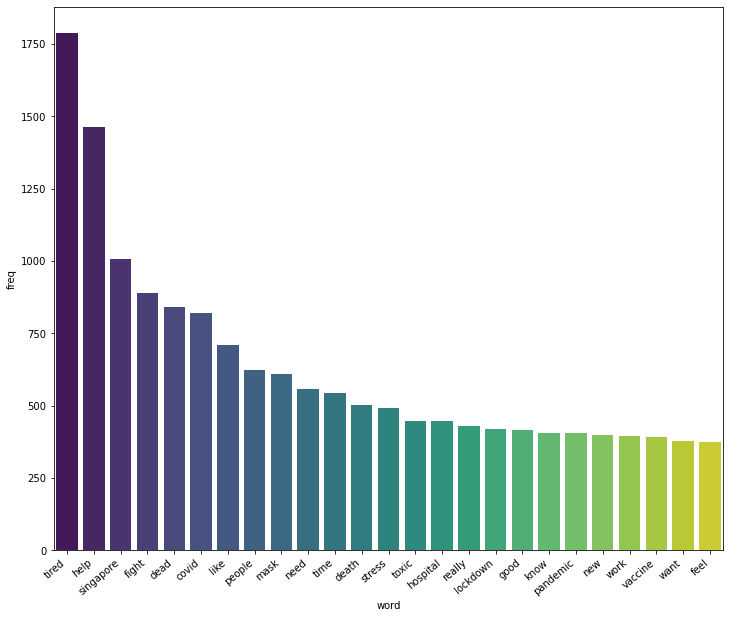

In [21]:
# Comparing with Tfidf vectorizer 

from sklearn.feature_extraction import text 
my_additional_sw = [ 'im', 'day']
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_sw)


# Vectorization 
Tfidf = TfidfVectorizer(stop_words=stop_words)
bow = Tfidf.fit_transform(data.clean_tweet4)
word_freq = dict(zip(Tfidf.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(25), columns = ['word', 'freq'])

# Visualzie the vectorized tweets 
fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="viridis", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show(); 